#### Author : Maximiliano Lopez Salgado
#### First commit: 2023-05-25
#### Last commit: 2023-05-25
#### Description: This notebook is used to perform the machine learning task

# Linear Regression

<b>Linear Regression is used when we have a relationship between one dependent variable and one independent. We use the line equation to find the best fit for the data points.

The square of the difference between the predicted and actual output represents the algorithm loss.

If we use more than one independent variable, we call it Multiple Linear Regression.

Multiple Linear Regression and simple Linear Regression make the same assumptions:

Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.

Independence of observations: the observations in the dataset were collected using statistically valid methods, and there are no hidden relationships among variables.</b>

In [221]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_absolute_percentage_error

In [222]:
# import the original hour.csv file
hour_df = pd.read_csv('../datasets/hour.csv')

# show the first 5 rows of the hour.csv file
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [223]:
# drop the instant column
hour_df.drop('instant', axis=1, inplace=True)

# change the names of the columns
hour_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weathersit':'weather', 'hum':'humidity', 'cnt':'count'}, inplace=True)

# show the first 5 rows of the hour.csv file
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [224]:
# change the data type of the date column
hour_df['date'] = pd.to_datetime(hour_df['date'])

# show the first 5 rows of the hour.csv file
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<Axes: >

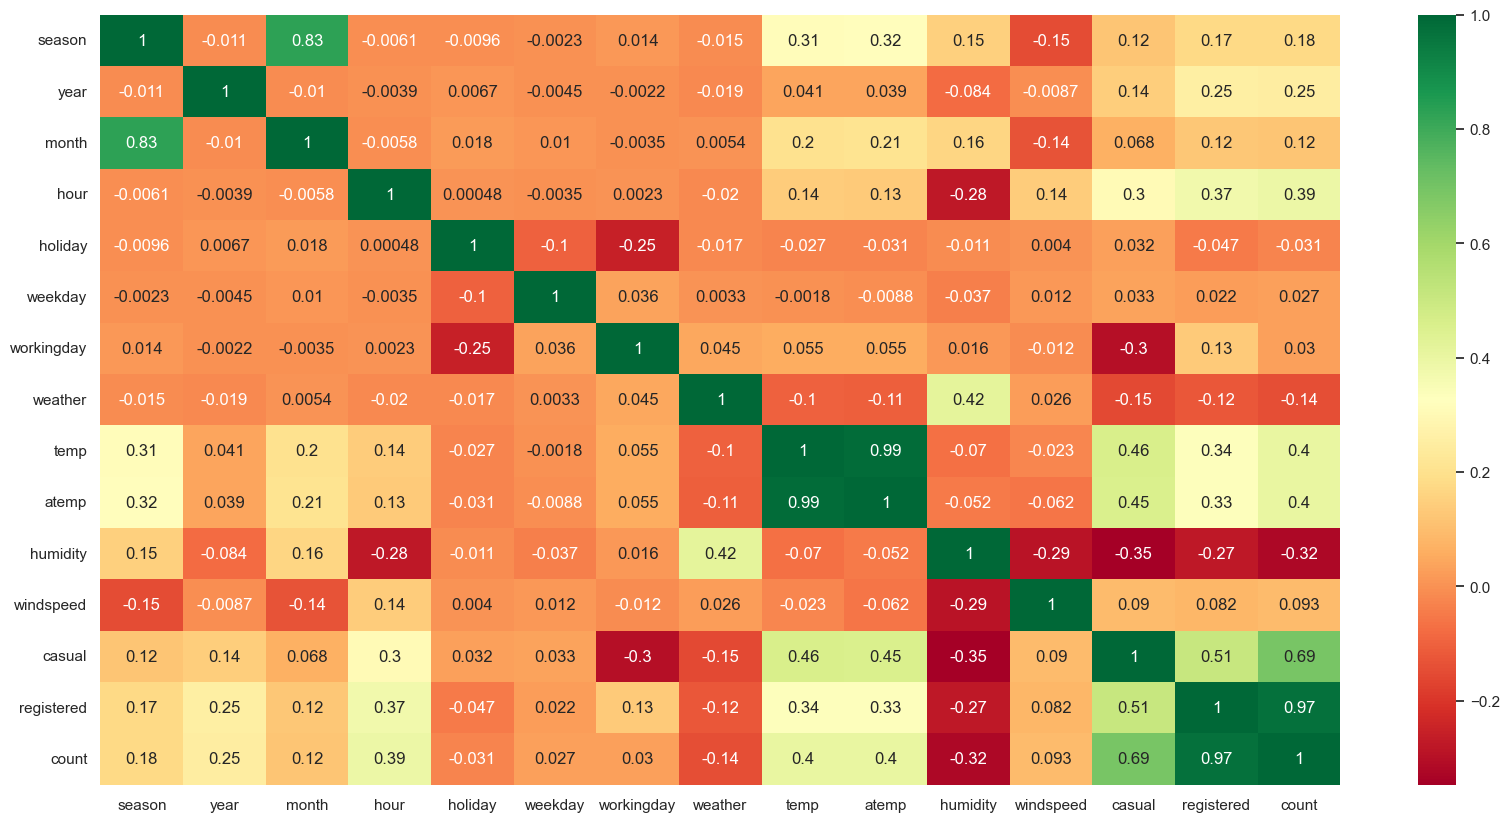

In [225]:
# search for correlations between the variables in a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(hour_df.corr(), annot=True, cmap='RdYlGn')

In [226]:
# drop the temp and keep only atemp columns because they are highly correlated with each other
hour_df.drop('temp', axis=1, inplace=True)

# drop season column because it is highly correlated with the month column
hour_df.drop('season', axis=1, inplace=True)

# drop the casual and registered columns because they are highly correlated with the count column
hour_df.drop('casual', axis=1, inplace=True)
hour_df.drop('registered', axis=1, inplace=True)

# drop the date column because it is not needed
hour_df.drop('date', axis=1, inplace=True)

# drop holiday and workingday columns because they are not needed
hour_df.drop('holiday', axis=1, inplace=True)

# show the first 5 rows of the hour_df file
hour_df.head()



,year,month,hour,weekday,workingday,weather,atemp,humidity,windspeed,count
0,0,1,0,6,0,1,0.2879,0.81,0.0,16
1,0,1,1,6,0,1,0.2727,0.80,0.0,40
2,0,1,2,6,0,1,0.2727,0.80,0.0,32
3,0,1,3,6,0,1,0.2879,0.75,0.0,13
4,0,1,4,6,0,1,0.2879,0.75,0.0,1


<Axes: >

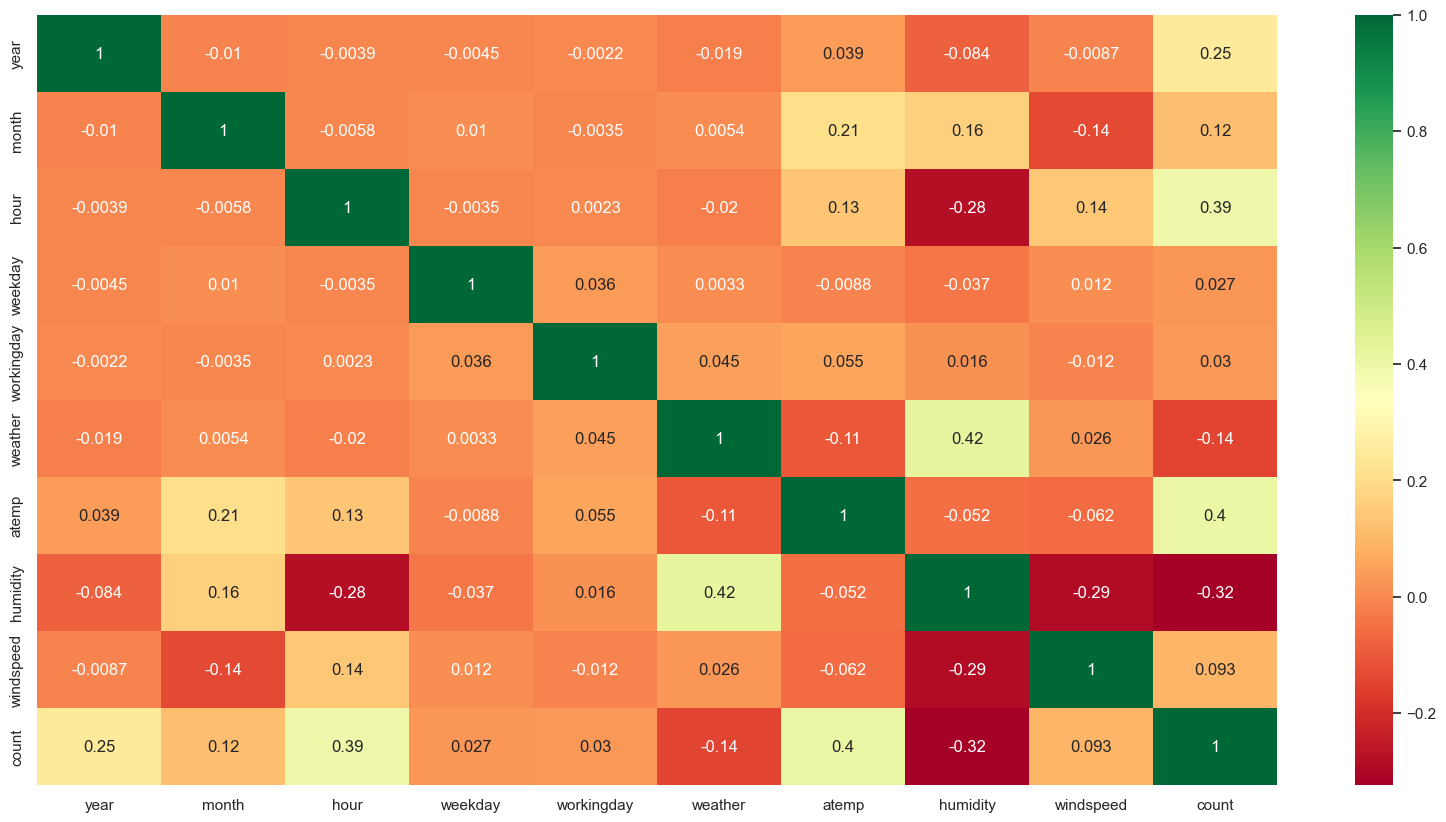

In [227]:
# show the heatmap again
plt.figure(figsize=(20, 10))
sns.heatmap(hour_df.corr(), annot=True, cmap='RdYlGn')

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

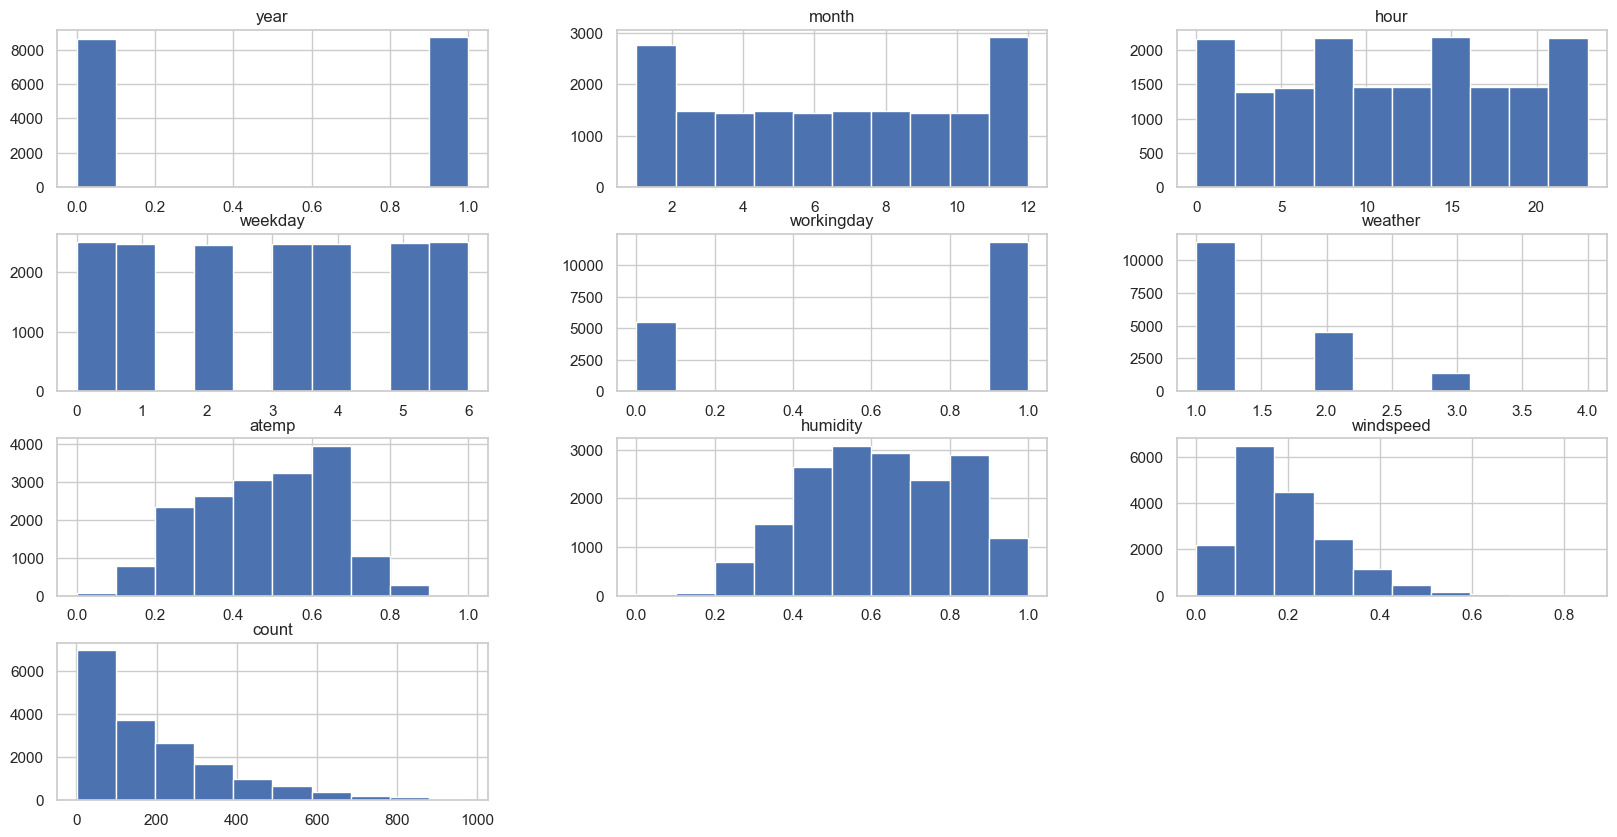

In [228]:
# look if the data has a normal distribution
hour_df.hist(figsize=(20, 10))


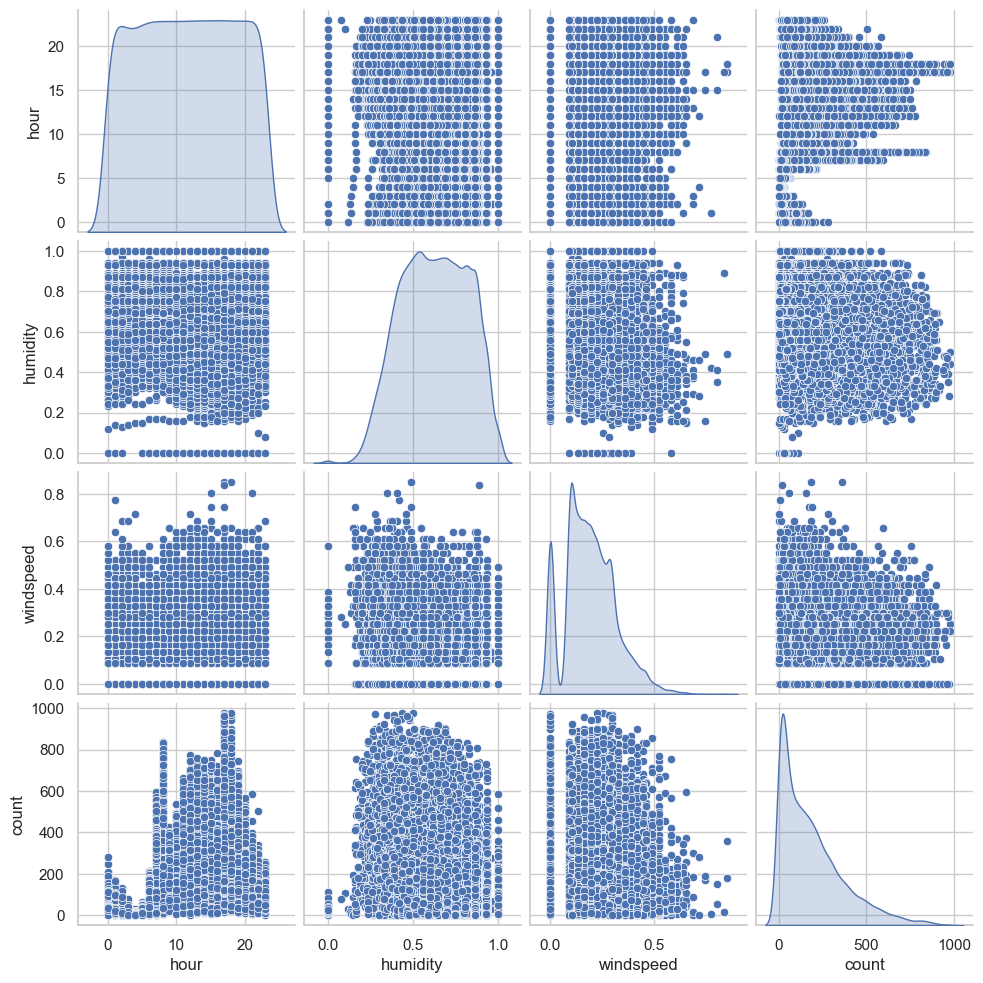

In [229]:
# search for linearity between the variables
sns.pairplot(hour_df, x_vars=['hour', 'humidity', 'windspeed', 'count'], y_vars=['hour', 'humidity', 'windspeed', 'count'], diag_kind='kde')

## Encoding cathegorical variables

In [230]:
hour_df.head()

,year,month,hour,weekday,workingday,weather,atemp,humidity,windspeed,count
0,0,1,0,6,0,1,0.2879,0.81,0.0,16
1,0,1,1,6,0,1,0.2727,0.80,0.0,40
2,0,1,2,6,0,1,0.2727,0.80,0.0,32
3,0,1,3,6,0,1,0.2879,0.75,0.0,13
4,0,1,4,6,0,1,0.2879,0.75,0.0,1


In [231]:
# Use get_dummies for encoding categorical variables with unique column names
new_season = pd.get_dummies(hour_df['month'], prefix='month', drop_first=False)
new_weather = pd.get_dummies(hour_df['weather'], prefix='weather', drop_first=False)
new_year = pd.get_dummies(hour_df['year'], prefix='year', drop_first=False)

# Drop the old columns
hour_df.drop(['month', 'weather', 'year'], axis=1, inplace=True)

# Concatenate the encoded columns with the original dataframe
hour_df_encoded = pd.concat([hour_df, new_season, new_weather, new_year], axis=1)

In [232]:
hour_df_encoded.head()

,hour,weekday,workingday,atemp,humidity,windspeed,count,month_1,month_2,month_3,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,year_0,year_1
0,0,6,0,0.2879,0.81,0.0,16,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,6,0,0.2727,0.80,0.0,40,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,6,0,0.2727,0.80,0.0,32,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,6,0,0.2879,0.75,0.0,13,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,6,0,0.2879,0.75,0.0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [233]:
# weekday is also a categorical variable. 
# We will encode them with LabelEncoder and OneHotEncoder
# LabelEncoder
le = LabelEncoder()
hour_df_encoded['weekday'] = le.fit_transform(hour_df_encoded['weekday'])

ohe_weekday = OneHotEncoder()
weekday_encoded = ohe_weekday.fit_transform(hour_df_encoded['weekday'].values.reshape(-1, 1)).toarray()
weekday_df = pd.DataFrame(weekday_encoded, columns=["weekday_" + str(int(i)) for i in range(weekday_encoded.shape[1])])

hour_df_encoded = pd.concat([hour_df_encoded, weekday_df], axis=1)
hour_df_encoded.drop(['weekday'], axis=1, inplace=True)

hour_df_encoded.head()


,hour,workingday,atemp,humidity,windspeed,count,month_1,month_2,month_3,month_4,...,weather_4,year_0,year_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.2879,0.81,0.0,16,1,0,0,0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0.2727,0.80,0.0,40,1,0,0,0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,0.2727,0.80,0.0,32,1,0,0,0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0,0.2879,0.75,0.0,13,1,0,0,0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,0,0.2879,0.75,0.0,1,1,0,0,0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Split the data into train and test sets

In [234]:
# Use info from 2011 to predict in 2012.
# Split the data into train, validation, and test sets
train_df = hour_df_encoded[hour_df_encoded['year_0'] == 0]
test_df = hour_df_encoded[hour_df_encoded['year_0'] == 1]

# Drop the year columns
train_df.drop(['year_0', 'year_1'], axis=1, inplace=True)
test_df.drop(['year_0', 'year_1'], axis=1, inplace=True)

# Split the train data into train and validation sets
X_train = train_df.drop('count', axis=1)
y_train = train_df['count']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Split the test data into test and validation sets
X_test = test_df.drop('count', axis=1)
y_test = test_df['count']

X_test, X_val_test, y_test, y_val_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [235]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8734 entries, 8645 to 17378
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        8734 non-null   int64  
 1   workingday  8734 non-null   int64  
 2   atemp       8734 non-null   float64
 3   humidity    8734 non-null   float64
 4   windspeed   8734 non-null   float64
 5   count       8734 non-null   int64  
 6   month_1     8734 non-null   uint8  
 7   month_2     8734 non-null   uint8  
 8   month_3     8734 non-null   uint8  
 9   month_4     8734 non-null   uint8  
 10  month_5     8734 non-null   uint8  
 11  month_6     8734 non-null   uint8  
 12  month_7     8734 non-null   uint8  
 13  month_8     8734 non-null   uint8  
 14  month_9     8734 non-null   uint8  
 15  month_10    8734 non-null   uint8  
 16  month_11    8734 non-null   uint8  
 17  month_12    8734 non-null   uint8  
 18  weather_1   8734 non-null   uint8  
 19  weather_2   8734 non-nu

## Scale the data

In [236]:
# bring all the values to a uniform range
# remember that the scaling is applied because the Gradient Descent method that we use to minimize our underlying cost function, converges much faster with scaling than without it.

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Train and fit the model and make predictions

In [237]:
# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_val_scaled)

In [240]:
# create a function that will calculate the metrics
def calculate_metrics(y_true, y_pred):
    print('R2 score: {}'.format(r2_score(y_true, y_pred)))
    print('Mean Squared Error: {}'.format(mean_squared_error(y_true, y_pred)))
    print('Mean Absolute Error: {}'.format(mean_absolute_error(y_true, y_pred)))
    print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print('Explained Variance Score: {}'.format(explained_variance_score(y_true, y_pred)))

# calculate the metrics
calculate_metrics(y_val, y_pred)

R2 score: 0.32573749390346596
Mean Squared Error: 29457.164559664016
Mean Absolute Error: 130.13214841514025
Root Mean Squared Error: 171.63089628520856
Explained Variance Score: 0.32633962229528757


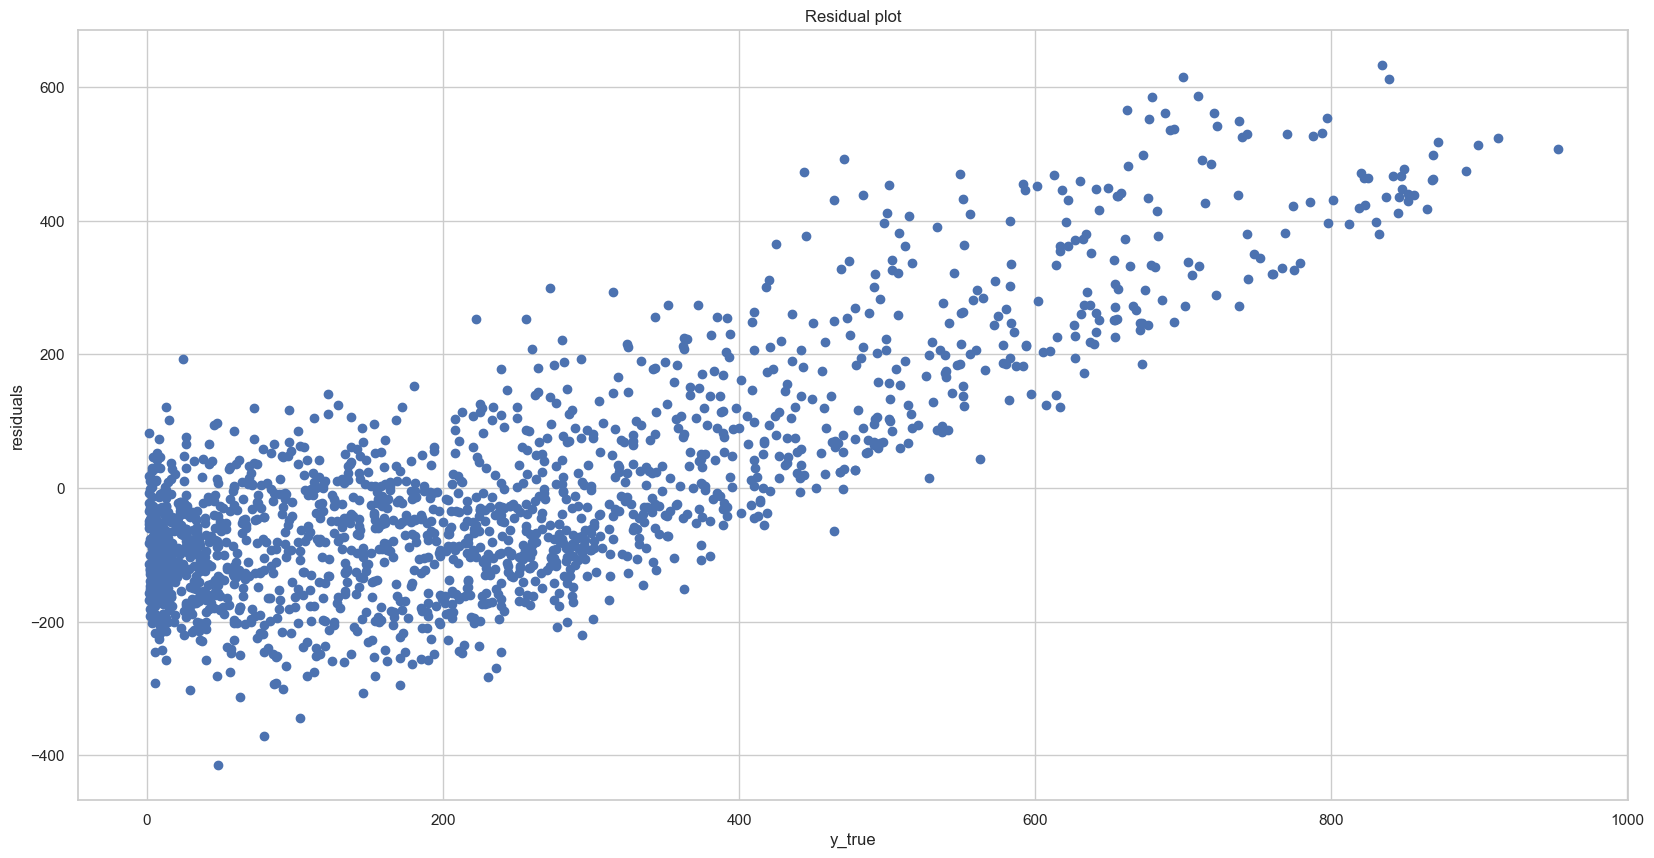

In [239]:
# create a function that will plot the residuals
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(20, 10))
    plt.scatter(y_true, residuals)
    plt.title('Residual plot')
    plt.xlabel('y_true')
    plt.ylabel('residuals')
    plt.show()

# call the function to plot the residuals
plot_residuals(y_val, y_pred)

####  The scatter plot of the residuals shows a pattern where the residuals are concentrated around a diagonal line with a positive slope. This suggests that the model's predictions are generally close to the true values, but there is some level of deviation or error.

#### The points clustered around the lower end of the y-axis (-200 to 0) and y_pred value of 0 indicate cases where the model tends to underestimate the true values. These points are closer to the lower end of the y_true values (200 to 400), indicating that the model's predictions are lower than the actual values in this range.

#### The majority of points being distributed along a line with a positive slope suggests that the model's predictions have a moderate positive correlation with the true values. However, it's important to note that the correlation is not perfect, as there is still some level of variability or scatter around the line.

#### Overall, the scatter plot of the residuals provides insights into the model's performance and can help identify areas where the model tends to overestimate or underestimate the true values. It can also indicate the level of variability in the predictions and highlight any patterns or trends in the residuals.